## Stefan Iacob (s4575121), Bas Krahmer (s4616553), Davide Sabeddu (s1032453)

# Problem 1a
<img src="1a.jpg">

Problem 1b
<img src="1b.jpg">

## Problem 2a
<img src="0001.jpg">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})


## Problem 2b

In [2]:
r_1 = [24/36, 10/36, 2/36]
r_2 = [10/36, 24/36, 2/36]
r_3 = [1/36, 1/36, 16/36]
r_4 = [1/36, 1/36, 16/36]
P_rs = []
P_rs.append(r_1)
P_rs.append(r_2)
P_rs.append(r_3)
P_rs.append(r_4)
P_rs = np.array(P_rs)

P_rs.T

array([[0.67, 0.28, 0.03, 0.03],
       [0.28, 0.67, 0.03, 0.03],
       [0.06, 0.06, 0.44, 0.44]])

## 2c

In [3]:
def sample_distribution(N_s, print_dist=False):

    # Generate responses
    r_s0 = np.random.choice([1,2,3,4], (N_s), p = P_rs.T[0])
    r_s1 = np.random.choice([1,2,3,4], (N_s), p = P_rs.T[1])
    r_s2 = np.random.choice([1,2,3,4], (N_s), p = P_rs.T[2])

    # Zip responses to corresponding stimuli
    pairs_0 = list(zip(np.zeros(len(r_s0)).astype(int)+1, r_s0))
    pairs_1 = list(zip(np.zeros(len(r_s0)).astype(int)+2, r_s1))
    pairs_2 = list(zip(np.zeros(len(r_s0)).astype(int)+3, r_s2))

    # Zip all samples together
    total_samples = pairs_0 + pairs_1 + pairs_2


    n_r_s0 = [0, 0, 0, 0]
    n_r_s1 = [0, 0, 0, 0]
    n_r_s2 = [0, 0, 0, 0]

    for s, r in pairs_0:
        n_r_s0[r-1] += 1

    for s, r in pairs_1:
        n_r_s1[r-1] += 1

    for s, r in pairs_2:
        n_r_s2[r-1] += 1

    p_r_s0 = np.array(n_r_s0)/N_s
    p_r_s1 = np.array(n_r_s1)/N_s
    p_r_s2 = np.array(n_r_s2)/N_s
    
    P_rs_sampled = []
    P_rs_sampled.append(p_r_s0)
    P_rs_sampled.append(p_r_s1)
    P_rs_sampled.append(p_r_s2)
    P_rs_sampled = np.array(P_rs_sampled)
    
    if print_dist:
        print("--- Original distribution ---")
        print(P_rs.T)

        print("\n--- Sampled distribution ---")
        print(P_rs_sampled)

        print("\n --- N_samples: {} ---".format(N_s))
    
    return P_rs_sampled

N_s = 500 # Number of samples per stimulus
sampled = sample_distribution(N_s, print_dist=True)


--- Original distribution ---
[[0.67 0.28 0.03 0.03]
 [0.28 0.67 0.03 0.03]
 [0.06 0.06 0.44 0.44]]

--- Sampled distribution ---
[[0.65 0.28 0.03 0.04]
 [0.28 0.66 0.02 0.03]
 [0.07 0.05 0.45 0.43]]

 --- N_samples: 500 ---


## 2D

C:\Users\Davide\Anaconda3\lib\site-packages\numpy\ma\core.py:2788: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


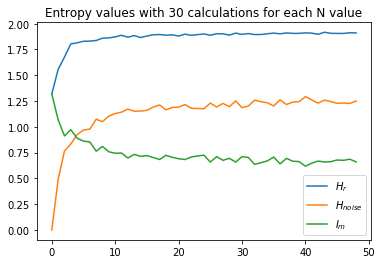

In [4]:
def response_entropy(P):
    r_sums = np.sum(P, axis=0)
    p_r = r_sums / (np.sum(r_sums))
    return -1 * ma.sum([r * ma.log2(r) for r in p_r])

def noise_entropy(P):
    s_sums = np.sum(P, axis=1)
    p_s = s_sums / (np.sum(s_sums))
    return -1 * ma.sum(p_s * ma.sum([r * ma.log2(r) for r in P], axis=1))

def find_entropies(N, n_calculations=10):
    
    H_r_list = np.zeros(n_calculations)
    H_noise_list = np.zeros(n_calculations)
    
    for i in range(n_calculations):
        dist = sample_distribution(N)
        H_r_list[i] = response_entropy(dist)
        H_noise_list[i] = noise_entropy(dist)
        
    return np.mean(H_r_list), np.mean(H_noise_list)

N_values = np.arange(1,50)
H_r_values = np.zeros(len(N_values))
H_noise_values = np.zeros(len(N_values))
n_calc = 30

for N_val in N_values:
    H_r_val, H_noise_val = find_entropies(N_val, n_calc)
    H_r_values[N_val-1] = H_r_val
    H_noise_values[N_val-1] = H_noise_val

plt.title('Entropy values with {} calculations for each N value'.format(n_calc))
plt.plot(H_r_values, label='$H_r$')
plt.plot(H_noise_values, label='$H_{noise}$')
plt.plot(H_r_values - H_noise_values, label='$I_m$')
plt.legend()

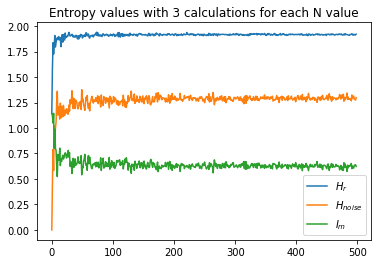

In [5]:
N_values = np.arange(1,500)
H_r_values = np.zeros(len(N_values))
H_noise_values = np.zeros(len(N_values))
n_calc = 3

for N_val in N_values:
    H_r_val, H_noise_val = find_entropies(N_val, n_calc)
    H_r_values[N_val-1] = H_r_val
    H_noise_values[N_val-1] = H_noise_val

plt.title('Entropy values with {} calculations for each N value'.format(n_calc))
plt.plot(H_r_values, label='$H_r$')
plt.plot(H_noise_values, label='$H_{noise}$')
plt.plot(H_r_values - H_noise_values, label='$I_m$')
plt.legend()

In [6]:
H_r_val, H_noise_val = find_entropies(50000, 1)
print('Response entropy: {}'.format(H_r_val))
print('Noise entropy: {}'.format(H_noise_val))

Response entropy: 1.918597566484812
Noise entropy: 1.2933569532068965


In the analytical computation, the value found for the noise entropy was 1.9 and the value for the noise entropy 1.34. These are close to the values above, but still differ quite a bit for the decimals. This can however be attributed to the roundoff error, where in the computation of the noise entropy more roundoff is present and thus the error can be of a larger magnitute. 

# Problem 3a
<img src="3.a.jpg">
